In [1]:
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np
import random 
import networkx as nx

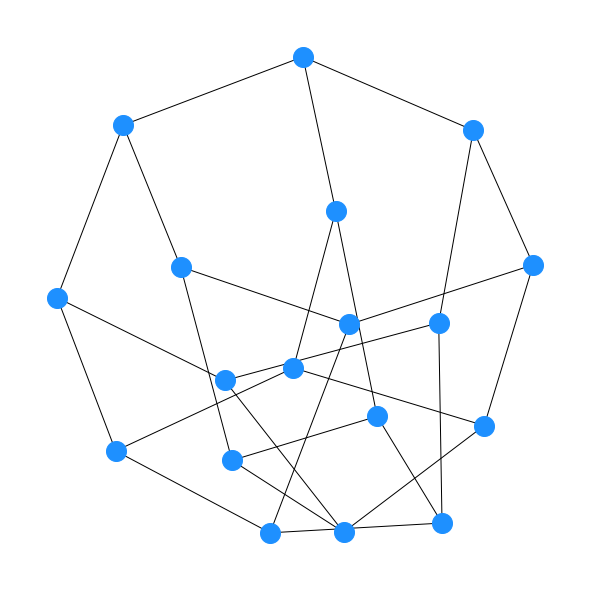

In [2]:
plt.figure(figsize=(8,8))
G = nx.turan_graph(10,10)  # 5x5 grid

G = nx.icosahedral_graph()  # 5x5 grid
G = nx.pappus_graph()  # 5x5 grid

pos = nx.spring_layout(G, scale=2, seed=942, iterations=310)
nx.draw(G, pos, node_color = 'dodgerblue', node_size=400)

connect={}
coordinate = {}
nodes = []
for e in G.edges:
    connect[e[0]+1,e[1]+1]=sqrt( (pos[e[0]][0]-pos[e[1]][0])**2 + (pos[e[0]][1]-pos[e[1]][1])**2  )
    connect[e[1]+1,e[0]+1] = connect[e[0]+1,e[1]+1]
    nodes.append(e[0]+1)
    nodes.append(e[1]+1)
    
nodes= list(set(nodes))
N= len(nodes)
for n in G.nodes:
    coordinate[n+1,'X']=pos[n][0]
    coordinate[n+1,'Y']=pos[n][1]
plt.savefig('base_graph'+  ' .png', format='png', dpi=400)
plt.show()

In [3]:
model = AbstractModel()
model.i = RangeSet(N)
model.j = Set(initialize=model.i)

model.U = Var(model.i, within=Binary)

def rule_C1(model,i,j):
    if (i,j) in connect:
        return model.U[i]+ model.U[j]<= 1
    else:
        return Constraint.Skip
model.C1 = Constraint(model.i,model.j, rule=rule_C1)
            
model.C4 = ConstraintList()

def rule_OF(model):
    return sum(model.U[i] for i in model.i) 
model.obj = Objective(rule= rule_OF, sense=maximize)

opt = SolverFactory('cbc')
instance = model.create_instance()
results = opt.solve(instance) # solves and updates instance
if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
    print('feasible')
elif (results.solver.termination_condition == TerminationCondition.infeasible):
    print('infeasible')
else:
    print ('Solver Status:',  results.solver.status)  
print(value(instance.obj))
OF0 = value(instance.obj)

feasible
9.0


feasible
0 #FC766AFF
1 #B0B8B4FF
2 #184A45FF
3 #A59C94FF
4 gold
5 r
6 navy
7 #1f77b4
8 #ff7f0e
feasible
0 #FC766AFF
1 #B0B8B4FF
2 #184A45FF
3 #A59C94FF
4 gold
5 r
6 navy
7 #1f77b4
8 #ff7f0e
feasible
0 #FC766AFF
1 #B0B8B4FF
2 #184A45FF
3 #A59C94FF
4 gold
5 r
6 navy
7 #1f77b4


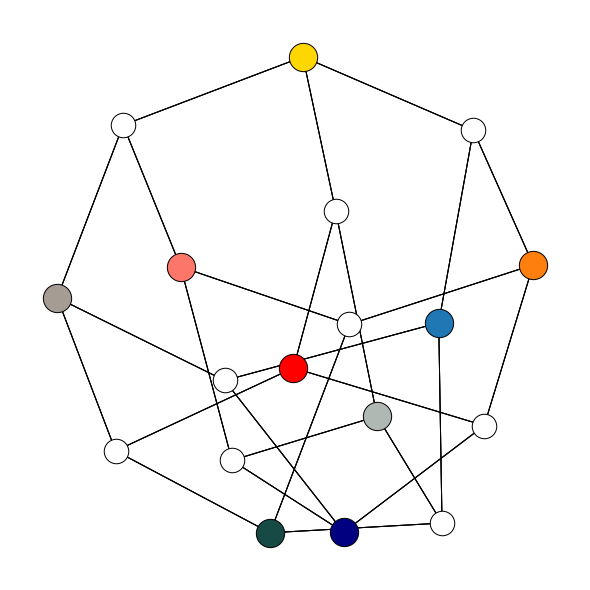

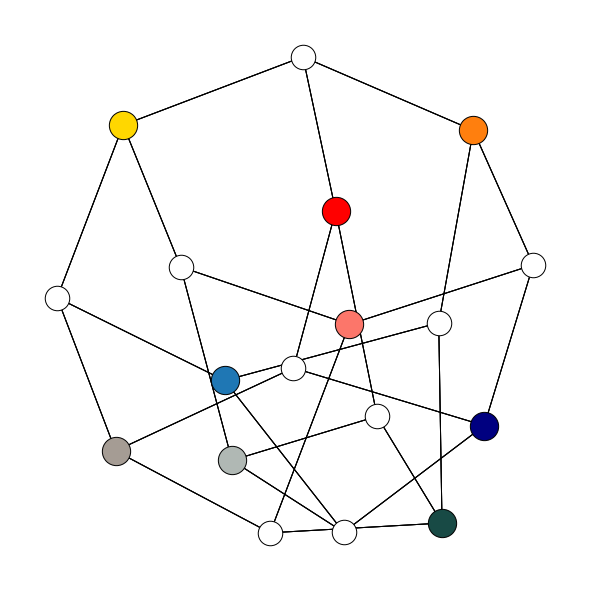

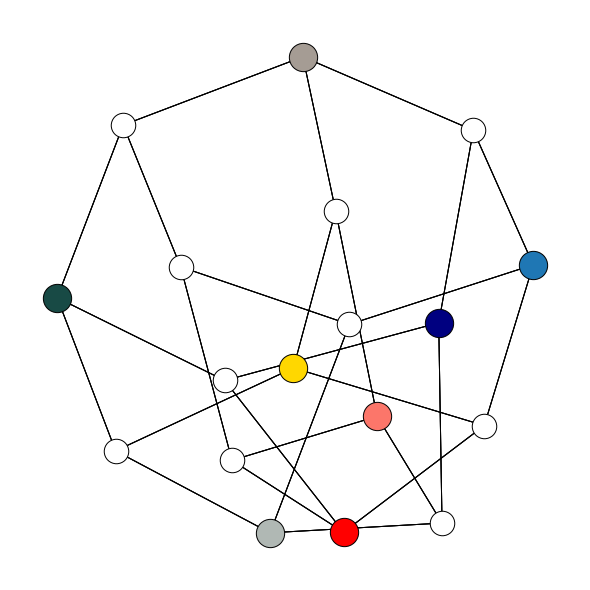

In [4]:
KOLOR = ['#FC766AFF' , '#B0B8B4FF' , '#184A45FF', '#A59C94FF', 'gold','r', 'navy']
KOLOR+=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for counter in range(1,50):
    results = opt.solve(instance) # solves and updates instance

    if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
        print('feasible')    
        plt.figure(figsize=(8,8))
        nx.draw(G, pos, node_color = 'w', node_size=400)
        for (f,t) in connect:
            x1= coordinate[f,'X']
            y1= coordinate[f,'Y']
            x2= coordinate[t,'X']
            y2= coordinate[t,'Y']
            plt.plot([x1,x2],[y1,y2], '-',lw=1, c='k', zorder= 1)
        n= 0 
        for i in instance.i:
            x1= coordinate[i,'X']
            y1= coordinate[i,'Y']
            plt.scatter(x1,y1,s=600, c='w',edgecolors = 'k', zorder= 2)
            if value(instance.U[i])>0:
                plt.scatter(x1,y1,s=800, c=KOLOR[n],edgecolors = 'k', zorder= 2)
                print(n, KOLOR[n])
                n+=1

        plt.axis('off')
        X = {i:value(instance.U[i]) for i in instance.i}
        a = 0
        for i in instance.i:
            if X[i] ==1:
                a += 1- instance.U[i] 
            else:
                a += instance.U[i]
        instance.C4.add(expr = a >= 1 )
        if value(instance.obj)<OF0:
            break 
        else:
            plt.savefig('penalty'+ str(counter) + ' .png', format='png', dpi=400)
    else:
        break
